In [21]:
## Imports ##

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
## Constants ##  

q = 1.6e-19 # Culombs
m = 1.67e-27  # kg charge of a particle
dt = 0.00001        # s  time step
steps = 100
# the number of steps 

In [54]:
## Initial Conditions ## 

# First array #
r_0 = np.array([0,0,0]) # Distance from source charge to charged partical
v_0 = np.array([0, 1.5e4, 0]) # Intial velosity 

# empty arrays #
r = np.zeros((steps, 3))
v = np.zeros((steps, 3))
a = np.zeros((steps, 3))

# First array of r and v #
r[0] = r_0
v[0] = v_0

#Define an E and a B that are in 3 element arrays

B = np.array([0,0,0])

E = np.array([0,10,0])

In [55]:
def lawrence_force(q, v, B, E, mass):
    # Compute the Lawrence force
    F = q * (E + np.cross(v, B))

    # Compute acceleration using F = ma
    a = F / mass

    return a

def euler_step(r, v, B, E, mass, q, dt):
    # Compute the Lawrence force and acceleration
    a = lawrence_force(q, v, B, E, mass)

    # Update velocity using the computed acceleration
    v_new = v + a * dt

    # Update position using the updated velocity
    r_new = r + v * dt

    return r_new, v_new

In [56]:
def simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E):
    """
    Simulate the trajectory of a charged particle in an electromagnetic and/or magnetic field using Euler's method.

    Inputs:
     q: Charge of the particle (Coulombs)
     m: Mass of the particle (kg)
     dt: Time step (s)
     steps: Number of simulation steps
     r_0: Initial position as a 3D array [x, y, z]
     v_0: Initial velocity as a 3D array [vx, vy, vz]
     B: Magnetic field as a 3D array [Bx, By, Bz]
     E: Electric field as a 3D array [Ex, Ey, Ez]

    Outputs:
     r: Array of particle positions over time (shape: (steps, 3))
     v: Array of particle velocities over time (shape: (steps, 3))
    """

    # Initialize arrays for position, velocity, and acceleration
    r = np.zeros((steps, 3))
    v = np.zeros((steps, 3))

    # Set initial conditions
    r[0] = r_0
    v[0] = v_0

    # Simulation loop
    for step in range(1, steps):
        r[step], v[step] = euler_step(r[step-1], v[step-1], B, E, m, q, dt)

    return r, v

/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_11237/3145003929.py:6: RuntimeWarning: overflow encountered in true_divide
  a = F / mass


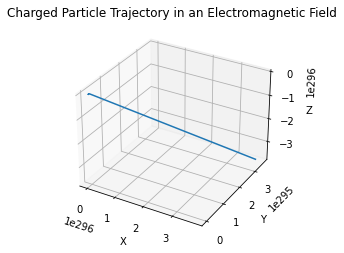

In [63]:
# Run simulation
particle_trajectory, particle_velocities = simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E)

# Plotting the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(particle_trajectory[:, 0], particle_trajectory[:, 1], particle_trajectory[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charged Particle Trajectory in an Electromagnetic Field')
plt.show()

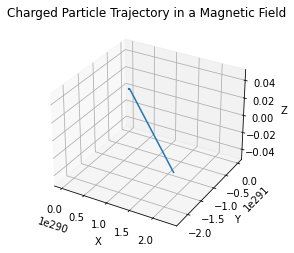

In [58]:
# Only B field
E = np.array([0, 0, 0])
B = np.array([0, 0, 1])

particle_trajectory, particle_velocities = simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E)

# Plotting the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(particle_trajectory[:, 0], particle_trajectory[:, 1], particle_trajectory[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charged Particle Trajectory in a Magnetic Field')
plt.show()



/var/folders/z1/7sz4p01d1sgfc13tlv12lvhw0000gn/T/ipykernel_11237/3145003929.py:6: RuntimeWarning: overflow encountered in true_divide
  a = F / mass
/Users/veronicaestrada/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:1654: RuntimeWarning: invalid value encountered in multiply
  tmp = array(a2 * b1)
/Users/veronicaestrada/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:1659: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b1, out=cp2)


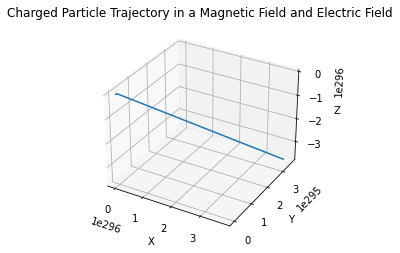

In [59]:

# Both E and B fields
E = np.array([0, 1e20, 0])
B = np.array([1, 0, 1])

particle_trajectory, particle_velocities = simulate_charged_particle(q, m, dt, steps, r_0, v_0, B, E)

# Plotting the trajectory in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(particle_trajectory[:, 0], particle_trajectory[:, 1], particle_trajectory[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Charged Particle Trajectory in a Magnetic Field and Electric Field')
plt.show()
